In [51]:
import numpy as np
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import signal 

print("Setup Complete")

Setup Complete


In [57]:
ppg_filepath = "../golden_data/ppg_golden_data.csv"

ppg_data = pd.read_csv(ppg_filepath, nrows=10000)

In [73]:
# Định nghĩa các tham số
fs = 50.0  # Tần số lấy mẫu, ví dụ 50 Hz
lowcut = 0.5  # Tần số cắt thấp, 0.5 Hz
highcut = 5.0  # Tần số cắt cao, 5 Hz
order = 4  # Bậc của bộ lọc

def butter_bandpass_coeffs(lowcut, highcut, fs, order=4):
    nyq = 0.5 * fs  # Tần số Nyquist
    low = lowcut / nyq
    high = highcut / nyq

    # Tính toán các hệ số bộ lọc analog
    z, p, k = signal.butter(order, [low, high], btype='band', analog=True, output='zpk')
    sos = signal.zpk2sos(z, p, k)
    return sos

# Hàm áp dụng bộ lọc Butterworth
def butter_bandpass_filter(data, sos):
    # Lọc xuôi
    y = signal.sosfilt(sos, data)
    # Lọc ngược
    y = signal.sosfilt(sos, y[::-1])[::-1]
    return y


In [74]:

# Áp dụng bộ lọc
sos = butter_bandpass_coeffs(lowcut, highcut, fs, order)
filtered_sig = butter_bandpass_filter(ppg_data, sos)

<Axes: >

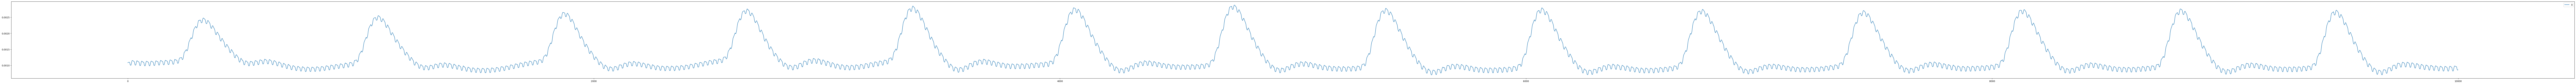

In [75]:
# Hiển thị tín hiệu trước và sau khi lọc
plt.figure(figsize=(200,6))
sns.lineplot(data=filtered_sig)